<div style="text-align:center"><span style="color:darkyellow; font-size:3.2em;">YOU ONLY LOOK 👀 ONCE</span></div>

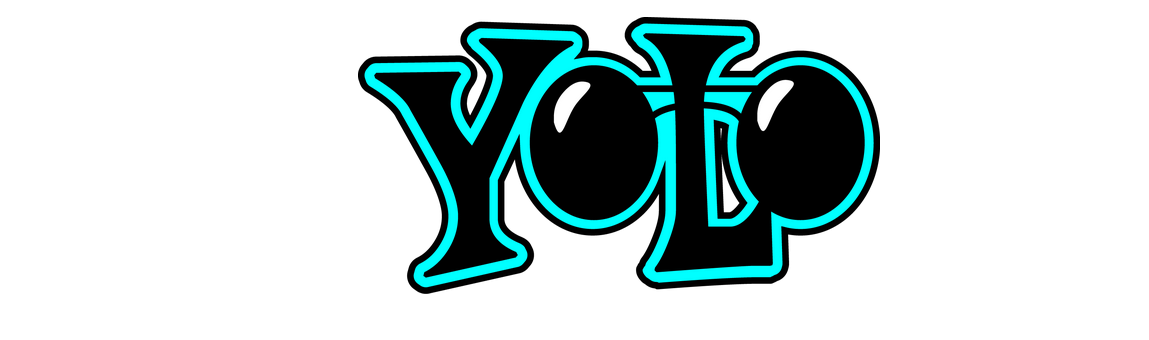

### <span style="color:darkorange"> Before we start, I have realized making notebooks and sharing my work not only helps others but more than anything it helps me understand the topics in more depth. Moreover, your support to my work would tell me that i am on the right path. Let's get started!.</u></span> 😄✌️

## Content

* [Quick Intro](#q1)
* [Theory](#q2)
  1. [Vectors](#q3)
  2. [NN Training](#q4)
  3. [Multiple Objects](#q5)
  4. [Training for N Objects](#q6)
  5. [Predictions](#q7)
  6. [Tweeks](#q8)


### Explanations in this kernel are orginal, the only "non orginal" element used in the Notebook are the pictures for which i would like to give credits to Codebasic's Youtube Channel.

<a id = "q1"></a>
# So What is YOLO?
It's not "You only live once" obviously, thats 75% correct. The only element that needs to be changed is **Look** in place of **Live**.
So YOLO is a piece of beautiful-beautiful algorithm for object detection that is super fast and it easily defeats the previous versions of algorithms invented before it, that include **R-CNN**, **Fast R-CNN**, **Single Window Object Detection**.
Now, R-CNN is very accurate, but it makes the GPU's cry because of its dimingly slow speed which is hardly 5 Fps on a GPU.

YOLO is a single-stage detector which might be less accurate but significantly faster than two-stage detectors.
**When launched in 2015 it was capable of super-real time object detection, obtaining 45 FPS on a GPU.**
A even faster variant, **Fast YOLO**, Claims to obtain a speed of 155 FPS on a GPU.

Now that should give you a certain idea of what it is and what is it's purpose. It's a day past christmas and if you're on leave do read the report on YOLOv3 which is completly honest unlike many academic papers. [[Here]](https://arxiv.org/pdf/1804.02767.pdf), After you read this my notebook obv :).


<a id = "q2"></a>
# Theory

**Let's Begin.**


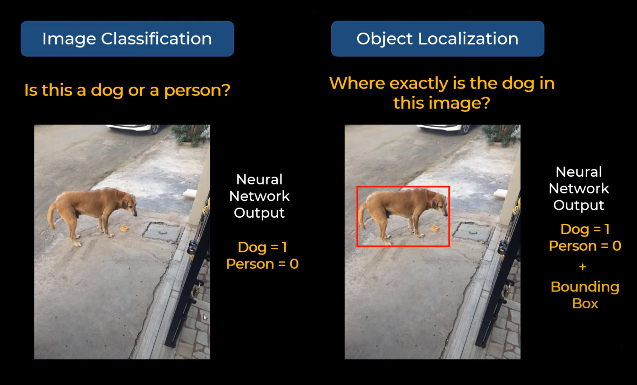


For image on the left **Image Classification**, Our nueral networks gives Output 1 for Dog and as there is no person so 0, or in others words we have Two classes named, DOG and PERSON, if dog's present-> 1, if Person's present->1.

Coming to our **Obeject Localization** image, we see our NN tries to se the bounds for our object, that is the cute doggo in our case, Where we get a bounding box plus the output for our classes(Dog and Person).

Now how does our NN do that? Let's look below.


<a id = "q3"></a>
## Vectors

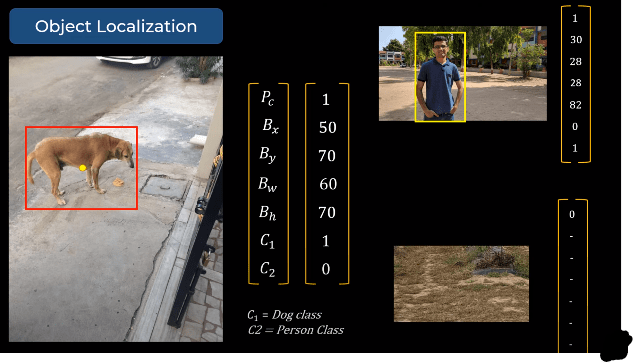



![](http://)For our Doggo's image our NN produces a output in a form of **Vector**, where:
* Pc is class's probability. If Dog or Person present✔️ then=1.
* Bx,By are x and y cordinates of center(yellow dot) on the plane.
* Bh,Bw are bounding boxe's cordinates, representing y for height and w for width. 
* C1 is Dog's class, so Dog present✔️ then=1, not present❌ then =0.

Similarly Coming to the Person's image,
* C2 is Person's class, so Person present✔️ then=1, not present❌ then =0.
* For the rest the vector follow the same rule as above.

**For our final image** with no person or dog, all they values are 0 cause the dont exist.


<a id = "q4"></a>
## NN Training

**Now how does our NN know what is dog/person and what is not, Cause NN understands NUMBERS and here we have image of a cute dog which wouldnt make any sense to our model.** 




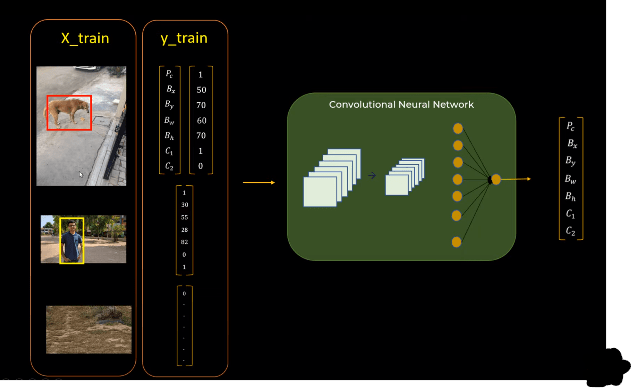


So now we give our models numbers, the only thing it understands, We give X_trains as images and Y_trains as vectors for our model to read.
Now we can do this for thousands and thousands of images and 
our model it will convert those images in form of vectors.

**Now if we give our model a new image....**

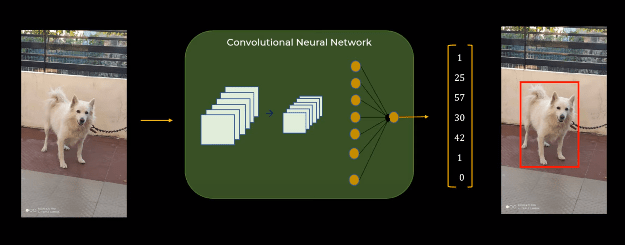

Our model produces a vector which not only tell us that a dog is present but also gives us a bounding box for the same.

<a id = "q5"></a>

## Multiple objects..?

Now our model is amazing for single obeject, cute doggos, perfect bouding boxes, perfect vectors...**Beautiful**, But what about multiple objects? We can have n' number of objects without bound so that's (n x 7), there are 7 features in our vector.
So let's say we know we have 12 objects, so that makes (12 x 7) vector which is massive! So how does YOLO tackle that?

Our model divides the image into multiple grids and produces vector for each grid rather than the whole objects.

Wait this looks too much, it isnt, just read along....
So here our model divides it into multiple grids, there are no limits. So, 3x3, 3x4, 4x4..you get my point.


So the video i took this picture from he decided to go with 4x4, so you can see 4 row boxes, 4 column boxes. Model produces vectors for each boxes seperately.
Now that is (4x4 by 7) in z direction.
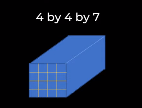


**Now coming back to the image**, 
Lets start from left to right.
So top left where there is no object everthng is 0.
Note: **Model calculates if the object is present in the 
grid/cell only if the center(yellow dot) is present.

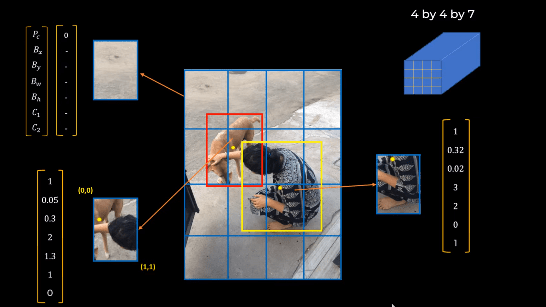



So..if you look the bottom left grid. It's vector shows it has a dog but not a person as the person's center point is not present in the cell.

And if you are thinking we have cordinates as (0,0) and (1,1) for the grid but then Bx,By is >= 1, that is 1.3 and 1....So, like mentioned in the vector rules, Bx, By is still the bounding box's height and width ( Red box for Dog) (Yellow for the person).

Now similarly for the grid on the right, Person's centre (Yellow line) is present so person is present acc to the vector.

**Okay so our multiple objects problem is solved✔️**
Now we train our model for the same.




<a id = "q6"></a>
## Training for Multiple (N) objects


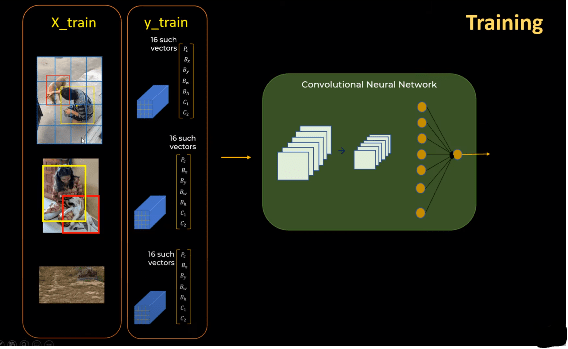

Now in the image above, the video maker took 3 images, there can be thousands with any number of grid. Here we have 4x4 therefore on the **y_train** we have 16 vectors. for each image.
Therefore now our model knows what it has to do with images, produces vectors based on bounding boxes. Absolutely **B-E-A-U-T-I-F-U-L**.



<a id = "q7"></a>
## Predictions


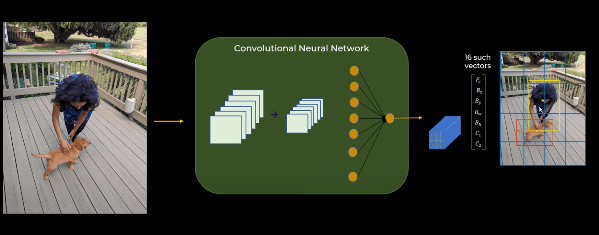


Well Well!, Voila! Model's perfect no itirations, in one go, single pass, it predcited the object. Perfect right? 
**But is it?**
What if our model produces multiple boxes for the object and we only want the most accurate one, but in a single go?
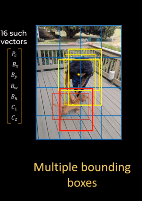
Let's look below.

<a id = "q8"></a>
## Final Tweeks

### 1.Multiple bouding Boxes - Non Max Suppression

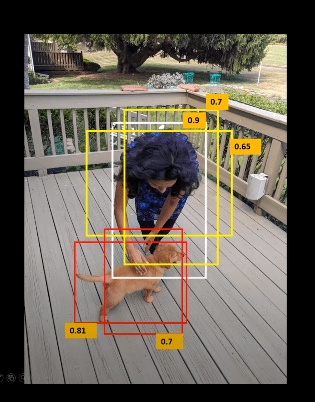


If there are multiple bouding boxes you might think the one with highest probability is the best case and we discard the rest. Well not entirely correct. There migth be boxes with high probablity but it dosent contain the person as a whole but only a part of him/her.
So we use a method called **Intersection over Union** which selects the section which overlaps the most with all the boxes for that object and then selects the highest probability box.

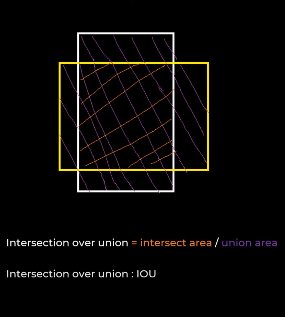

We do the same for all objects and this method is called **Non Max Suppression**.
And here's final bounding box for the person.
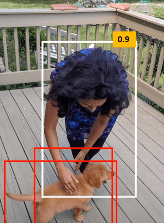








### 2. One grid with two centers?
So remember each grid produced it's own vector but it was still a single vector? So, what about two centers...that would mean two vectors? Well we tackle this by concatinating the vectors of the objects into a single vector. 
Example below :-


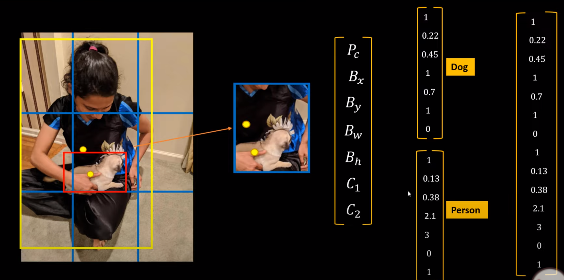


So the number of object does not matter, we simply concatinate the seperate vectors into one for our model.
After which we follow the same process again right from the beginning!




<div style="text-align:center"><span style="color:darkyellow; font-size:1.2em;">END</span></div>


## <span style="color:darkorange">It means a lot that you have read this far. Please do give me our feedbacks and comment below if you have questions, I am very active with responses. Lastly if you feel it was worth the read then ^ Cheers!</u></span> 😄👍

**Update|30-12-20**  
* Many have asked for the implementation of yolo, so i will release it based on this kernel's preformance.**
* Correction made in few paragraphs.